In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("MusicData.csv")

In [10]:
df.head()

,index,Format,Metric,Year,Number of Records,Value (Actual)
0,0,CD,Units,1973,1,NaN
1,1,CD,Units,1974,1,NaN
2,2,CD,Units,1975,1,NaN
3,3,CD,Units,1976,1,NaN
4,4,CD,Units,1977,1,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3008 non-null   int64  
 1   Format             3008 non-null   object 
 2   Metric             3008 non-null   object 
 3   Year               3008 non-null   int64  
 4   Number of Records  3008 non-null   int64  
 5   Value (Actual)     1351 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 141.1+ KB


In [12]:
df["Format"].nunique()

24

In [14]:
df["Metric"].nunique()

3

In [24]:
yearly_mean=df.groupby("Year")["Value (Actual)"].mean().sort_values(ascending=False).head(10)

In [18]:
print(yearly_mean)

Year
1973     949.630970
1974     946.711539
1975     951.461691
1976    1041.783017
1977    1459.080256
1978    1619.793357
1979    1330.875062
1980    1211.915118
1981    1213.417426
1982    1063.064081
1983    1005.533781
1984    1119.613597
1985    1098.369691
1986    1148.740563
1987    1105.411282
1988    1026.678621
1989     910.938440
1990    1006.853984
1991    1014.806330
1992    1146.225361
1993    1251.181440
1994    1478.651181
1995    1482.642970
1996    1482.343671
1997    1425.736334
1998    1580.017487
1999    1657.666796
2000    1594.287116
2001    1328.668171
2002    1207.691940
2003    1078.658523
2004     857.458324
2005     618.384674
2006     588.833144
2007     534.196710
2008     440.030537
2009     387.629726
2010     353.741273
2011     341.485160
2012     361.694878
2013     357.787853
2014     334.742309
2015     331.011047
2016     320.519459
2017     361.239863
2018     394.231973
2019     445.820923
Name: Value (Actual), dtype: float64


In [20]:
yearly_mean.sort_values(ascending=False).head(3)

Year
1999    1657.666796
1978    1619.793357
2000    1594.287116
Name: Value (Actual), dtype: float64

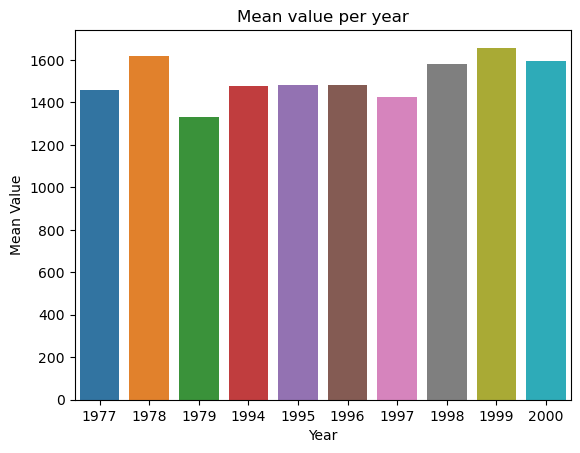

In [25]:
sns.barplot(x=yearly_mean.index,y=yearly_mean.values)
plt.title("Mean value per year")
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.show()

In [27]:
df["Format"].value_counts().head(3)

Format
CD                       141
DVD Audio                141
Ringtones & Ringbacks    141
Name: count, dtype: int64

In [28]:
df_sorted=df.sort_values("Year")

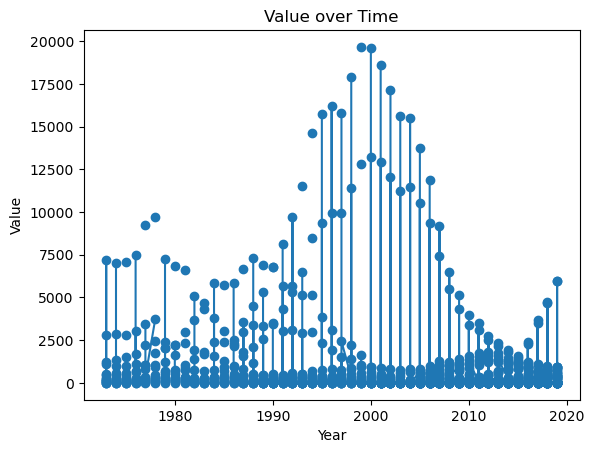

In [29]:
plt.plot(df_sorted["Year"],df_sorted["Value (Actual)"],marker="o")
plt.title("Value over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

In [30]:
df.groupby("Metric")["Value (Actual)"].max()

Metric
Units                1402.739373
Value               13214.500000
Value (Adjusted)    19667.327786
Name: Value (Actual), dtype: float64

In [31]:
df.groupby(["Year","Format"])["Value (Actual)"].mean()

Year  Format                     
1973  8 - Track                      1131.893941
      CD                                     NaN
      CD Single                              NaN
      Cassette                        176.203694
      Cassette Single                        NaN
                                        ...     
2019  Ringtones & Ringbacks            17.153081
      SACD                              0.294753
      SoundExchange Distributions     908.200000
      Synchronization                 276.262360
      Vinyl Single                      4.642671
Name: Value (Actual), Length: 1128, dtype: float64

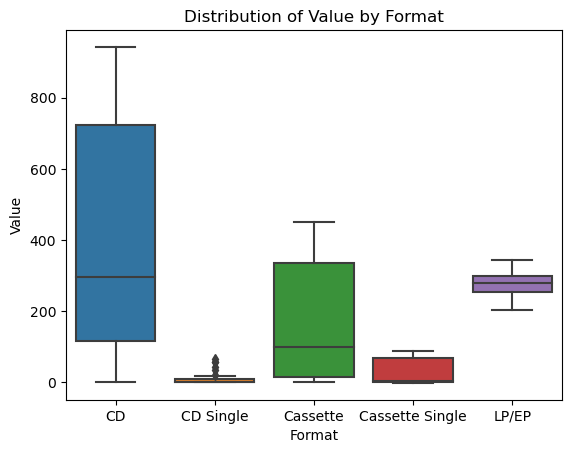

In [38]:
sns.boxplot(x="Format",y="Value (Actual)",data=df.head(200))
plt.title("Distribution of Value by Format")
plt.xlabel("Format")
plt.ylabel("Value")
plt.show()

C:\Users\KIIT\Downloads\jupyter\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


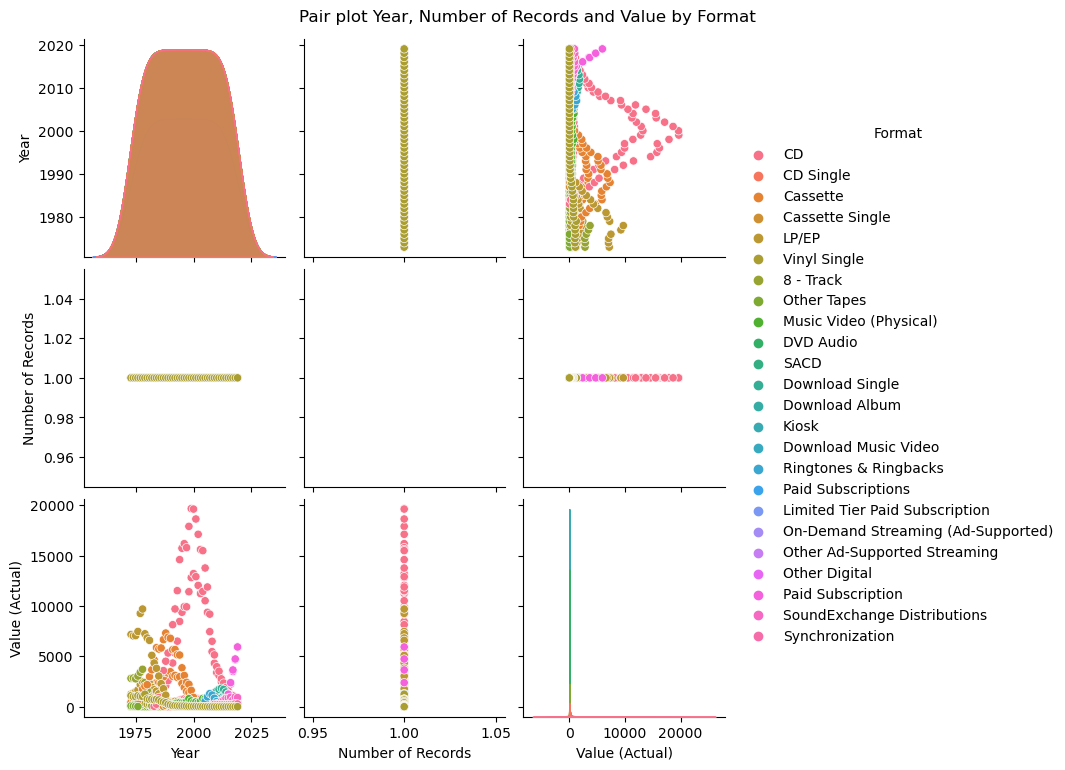

In [43]:
sns.pairplot(df, vars=["Year", "Number of Records", "Value (Actual)"], hue="Format")
plt.suptitle("Pair plot Year, Number of Records and Value by Format",y=1.02)
plt.show()
                    